### COVID-19 EDA and Visualization

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('covid_19_india.csv')


##### A sneak look into the dataset

In [27]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,06:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,06:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,06:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,06:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,06:00 PM,Kerala,3,0,0,0,3



#### Dropping the unnecessary columns

In [28]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [29]:
df = df.drop(['Sno', 'Time'], axis=1)

In [30]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,1,0,0,0,1
1,31-01-2020,Kerala,1,0,0,0,1
2,01-02-2020,Kerala,2,0,0,0,2
3,02-02-2020,Kerala,3,0,0,0,3
4,03-02-2020,Kerala,3,0,0,0,3




#### Rename the columns' name 

In [31]:
df.rename(columns={'State/UnionTerritory': 'State', 
                    'ConfirmedIndianNational': 'IndianNational',
                    'ConfirmedForeignNational': 'ForeignNational'}, inplace=True)

In [32]:
df.head()

,Date,State,IndianNational,ForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,1,0,0,0,1
1,31-01-2020,Kerala,1,0,0,0,1
2,01-02-2020,Kerala,2,0,0,0,2
3,02-02-2020,Kerala,3,0,0,0,3
4,03-02-2020,Kerala,3,0,0,0,3


In [33]:
df['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnatka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Lakshadweep',
       'Telangana'], dtype=object)

In [34]:
df['State'].nunique()

39

In [35]:
df.drop(df[df['State'] == 'Unassigned'].index, inplace=True)
df.drop(df[df['State'] == 'Cases being reassigned to states'].index, inplace=True)



#### Cleaning 'State' column with proper names

In [36]:
df['State'] = df['State'].str.replace('Telengana', 'Telangana')

In [37]:
df['State'] = df['State'].str.replace('Dadra and Nagar Haveli and Daman and Diu', 'Dadra & Nagar Haveli and Daman & Diu')

In [38]:
df

,Date,State,IndianNational,ForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,1,0,0,0,1
1,31-01-2020,Kerala,1,0,0,0,1
2,01-02-2020,Kerala,2,0,0,0,2
3,02-02-2020,Kerala,3,0,0,0,3
4,03-02-2020,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
18105,11-08-2021,Telangana,-,-,638410,3831,650353
18106,11-08-2021,Tripura,-,-,77811,773,80660
18107,11-08-2021,Uttarakhand,-,-,334650,7368,342462
18108,11-08-2021,Uttar Pradesh,-,-,1685492,22775,1708812




#### Replace '-' values with '0' 

In [39]:
df['IndianNational'] = df['IndianNational'].str.replace('-','0')
df['ForeignNational'] = df['ForeignNational'].str.replace('-','0')

In [40]:
# Checking for any '-' values
filteredRows = df[df['Confirmed'] == '-']

In [41]:
df

,Date,State,IndianNational,ForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,1,0,0,0,1
1,31-01-2020,Kerala,1,0,0,0,1
2,01-02-2020,Kerala,2,0,0,0,2
3,02-02-2020,Kerala,3,0,0,0,3
4,03-02-2020,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
18105,11-08-2021,Telangana,0,0,638410,3831,650353
18106,11-08-2021,Tripura,0,0,77811,773,80660
18107,11-08-2021,Uttarakhand,0,0,334650,7368,342462
18108,11-08-2021,Uttar Pradesh,0,0,1685492,22775,1708812


#

### Convert the numerical column to float type (error: int64)

In [42]:
df['IndianNational'] = df['IndianNational'].astype(float)
df['ForeignNational'] = df['ForeignNational'].astype(float)

In [43]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

##

#### Data Visualization

In [44]:
deaths_per_state = df.groupby('State')['Deaths'].sum().sort_values(ascending=False).reset_index()

# Converting the millions
deaths_per_state['Deaths'] = deaths_per_state['Deaths'] / 1e7

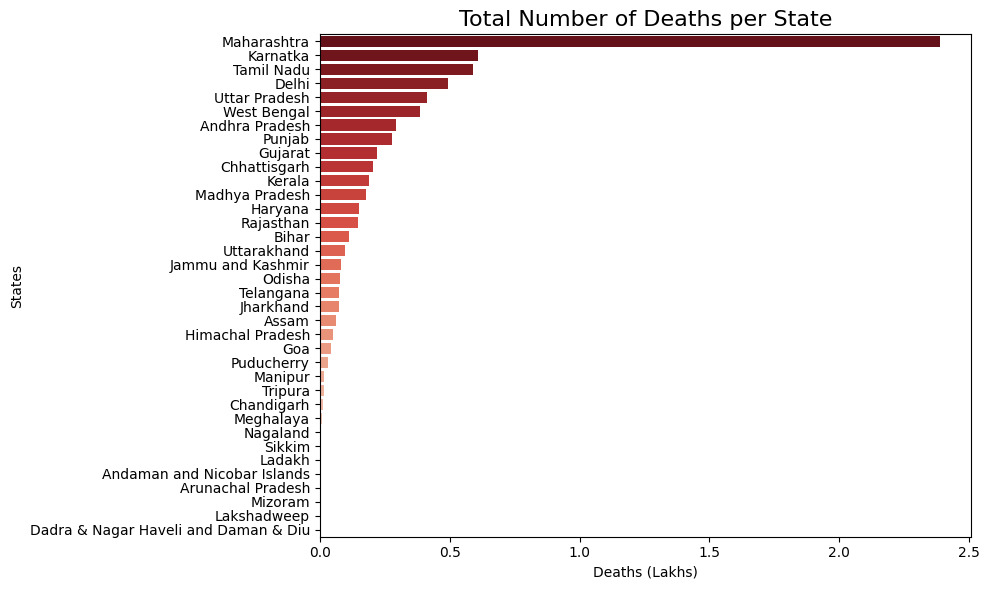

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths', y='State', data=deaths_per_state, palette='Reds_r')
plt.title("Total Number of Deaths per State", fontsize=16)
plt.xlabel('Deaths (Lakhs)')
plt.ylabel('States')
plt.tight_layout()
plt.show()

In [46]:
Cured_per_state = df.groupby('State')['Cured'].sum().sort_values(ascending=False).reset_index()

# Converting the millions
Cured_per_state['Cured'] = Cured_per_state['Cured'] / 1e7

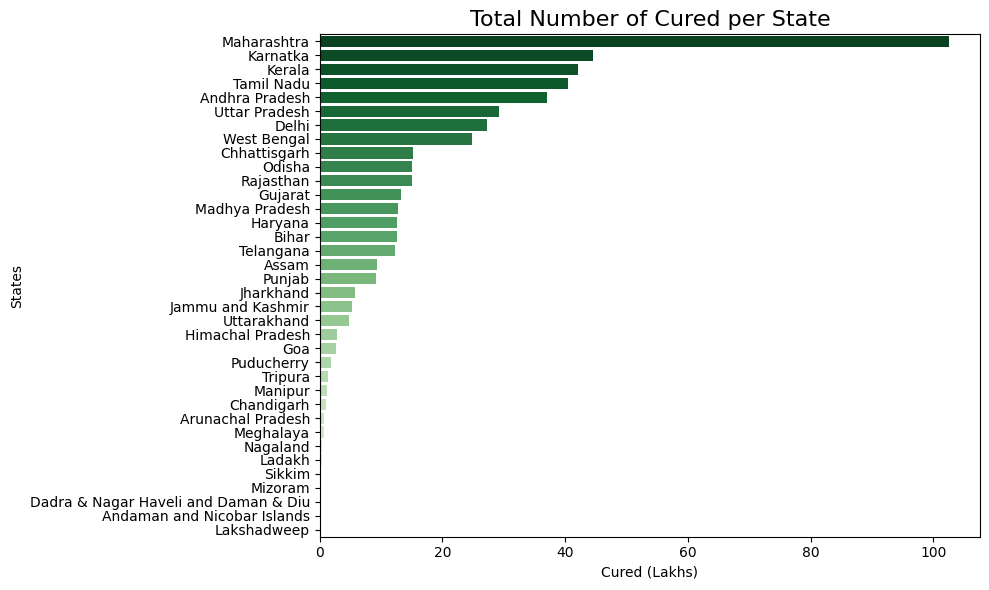

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cured', y='State', data=Cured_per_state, palette='Greens_r')
plt.title("Total Number of Cured per State", fontsize=16)
plt.xlabel('Cured (Lakhs)')
plt.ylabel('States')
plt.tight_layout()
plt.show()

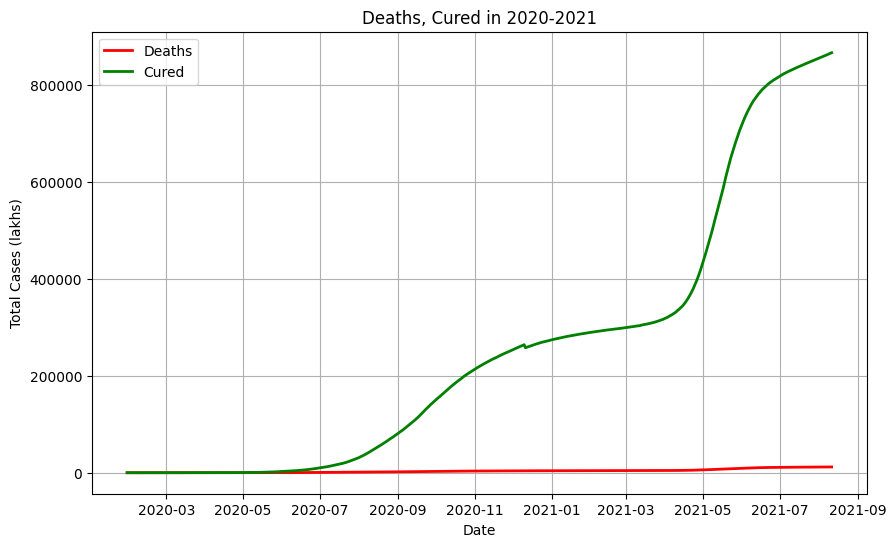

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Deaths', data=df, color='red', linewidth=2, ci=None, label='Deaths')
sns.lineplot(x='Date', y='Cured', data=df, color='green', linewidth=2, ci=None, label='Cured')
plt.title('Deaths, Cured in 2020-2021')
plt.xlabel('Date')
plt.ylabel('Total Cases (lakhs)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
df.to_csv('covid_19_india_cleaned.csv', index=False)